# Oasis Infobyte Internship

# Task 4 - Email Spam Detection with Machine Learning

# Problem Statement:
The objective of this project is to develop an email spam detector using machine learning techniques. The goal is to build a robust model that can accurately classify incoming emails as either spam or non-spam (ham) based on their content. The project will involve data preprocessing, feature extraction, model selection, training, and evaluation.

# Importing Libraries

In [1]:
# pip install wordcloud

In [2]:
import re
import nltk
import spacy


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy

# # Download necessary resources for NLTK and SpaCy
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm')

# Loading Dataset

In [4]:
data = pd.read_csv(r"C:\Users\bodak\Downloads\spam.csv")

In [5]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# Data Preprocessing

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data = data.rename(columns={'v1':'Category','v2':'Emails'})
data

,Category,Emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
data.describe()

,Category,Emails
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
data.shape

(5572, 2)

In [13]:
data.size

11144

In [14]:
data.isna().sum()

Category    0
Emails      0
dtype: int64

In [15]:
data.duplicated().sum()

403

In [16]:
data[data.duplicated()]

,Category,Emails
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data

,Category,Emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
data.duplicated().sum()

0

In [20]:
data['Category'].value_counts()

ham     4516
spam     653
Name: Category, dtype: int64

In [21]:
data['Category'].replace({'ham':'Ham','spam':'Spam'},inplace=True)

In [22]:
data

,Category,Emails
0,Ham,"Go until jurong point, crazy.. Available only ..."
1,Ham,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Ham,U dun say so early hor... U c already then say...
4,Ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,Spam,This is the 2nd time we have tried 2 contact u...
5568,Ham,Will Ì_ b going to esplanade fr home?
5569,Ham,"Pity, * was in mood for that. So...any other s..."
5570,Ham,The guy did some bitching but I acted like i'd...


In [23]:
data.groupby('Category').describe()

Emails                                                               
          count unique                                                top freq
Category                                                                      
Ham        4516   4516  Go until jurong point, crazy.. Available only ...    1
Spam        653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [24]:
# #checking number of characters in each sentence
# data['No. of Characters'] = data['Emails'].str.len()
# data.head()

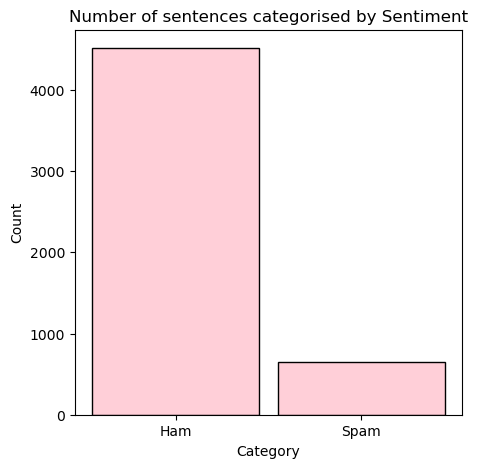

In [25]:
plt.figure(figsize = (5,5))
sns.histplot(data, x = 'Category', color = 'pink', shrink = 0.9)
plt.title('Number of sentences categorised by Sentiment')
plt.show()

# Text Preprocessing

In [26]:
#creating functions to clean the Sentences

def cleansmt (smt):
  emoji = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002500-\U00002BEF"  # chinese char
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         u"\U0001f926-\U0001f937"
         u"\U00010000-\U0010ffff"
         u"\u2640-\u2642" 
         u"\u2600-\u2B55"
         u"\u200d"
         u"\u23cf"
         u"\u23e9"
         u"\u231a"
         u"\ufe0f"                  # dingbats
         u"\u3030"
                      "]+", re.UNICODE)

  smt = re.sub('RT', '', smt)                                    # remove 'RT' from sentence
  smt = re.sub('#[A-Za-z0-9]+', '', smt)                         # remove the '#' from the sentence
  smt = re.sub('\\n', '', smt)                                   # remove the '\n' character
  smt = re.sub('https?:\/\/\S+', '', smt)                        # remove the hyperlinks
  smt = re.sub('@[\S]*', '', smt)                                # remove @mentions
  smt = re.sub('^[\s]+|[\s]+$', '', smt)                         # remove leading and trailing whitespaces
  smt = re.sub(emoji, '', smt)                                   # remove emojis
  smt = re.sub("[^A-Za-z]+"," ",smt).lower()                     # converting to lower
  smt = re.sub("[0-9]+"," ",smt)

  return smt

In [27]:
#Applying the above function on Data
data['Emails'] = data['Emails'].apply(cleansmt)
data

,Category,Emails
0,Ham,go until jurong point crazy available only in ...
1,Ham,ok lar joking wif u oni
2,Spam,free entry in a wkly comp to win fa cup final ...
3,Ham,u dun say so early hor u c already then say
4,Ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,Spam,this is the nd time we have tried contact u u ...
5568,Ham,will b going to esplanade fr home
5569,Ham,pity was in mood for that so any other suggest...
5570,Ham,the guy did some bitching but i acted like i d...


# Tokenization

In [28]:
# Tokenization
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the 'Emails' column
data['Emails'] = data['Emails'].apply(tokenize_text)
data

,Category,Emails
0,Ham,"[go, until, jurong, point, crazy, available, o..."
1,Ham,"[ok, lar, joking, wif, u, oni]"
2,Spam,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,Ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,Ham,"[nah, i, don, t, think, he, goes, to, usf, he,..."
...,...,...
5567,Spam,"[this, is, the, nd, time, we, have, tried, con..."
5568,Ham,"[will, b, going, to, esplanade, fr, home]"
5569,Ham,"[pity, was, in, mood, for, that, so, any, othe..."
5570,Ham,"[the, guy, did, some, bitching, but, i, acted,..."


# Removing stopwords

In [29]:
# Removing stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

In [30]:
data['Emails']=data['Emails'].apply(remove_stopwords)
data

,Category,Emails
0,Ham,"[go, jurong, point, crazy, available, bugis, n..."
1,Ham,"[ok, lar, joking, wif, u, oni]"
2,Spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,Ham,"[u, dun, say, early, hor, u, c, already, say]"
4,Ham,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,Spam,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,Ham,"[b, going, esplanade, fr, home]"
5569,Ham,"[pity, mood, suggestions]"
5570,Ham,"[guy, bitching, acted, like, interested, buyin..."


In [31]:
# Lemmatization
def get_wordnet_pos(tag):
    # Map POS tag to WordNet POS tag
    tag = tag[0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in tagged_tokens]
    return lemmatized_tokens

In [32]:
data['Emails'] = data['Emails'].apply(lemmatize_tokens)
data

,Category,Emails
0,Ham,"[go, jurong, point, crazy, available, bugis, n..."
1,Ham,"[ok, lar, joking, wif, u, oni]"
2,Spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,Ham,"[u, dun, say, early, hor, u, c, already, say]"
4,Ham,"[nah, think, go, usf, life, around, though]"
...,...,...
5567,Spam,"[nd, time, try, contact, u, u, pound, prize, c..."
5568,Ham,"[b, go, esplanade, fr, home]"
5569,Ham,"[pity, mood, suggestion]"
5570,Ham,"[guy, bitch, act, like, interested, buying, so..."


In [33]:
# Stemming
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [34]:
data['Emails'] = data['Emails'].apply(stem_tokens)
data

,Category,Emails
0,Ham,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,Ham,"[ok, lar, joke, wif, u, oni]"
2,Spam,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,Ham,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,Ham,"[nah, think, go, usf, life, around, though]"
...,...,...
5567,Spam,"[nd, time, tri, contact, u, u, pound, prize, c..."
5568,Ham,"[b, go, esplanad, fr, home]"
5569,Ham,"[piti, mood, suggest]"
5570,Ham,"[guy, bitch, act, like, interest, buy, someth,..."


In [35]:
#droping empty row
data.drop(data[data['Emails'] == ''].index, inplace = True)
data.reset_index(drop=True, inplace=True)

In [36]:
data

,Category,Emails
0,Ham,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,Ham,"[ok, lar, joke, wif, u, oni]"
2,Spam,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,Ham,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,Ham,"[nah, think, go, usf, life, around, though]"
...,...,...
5164,Spam,"[nd, time, tri, contact, u, u, pound, prize, c..."
5165,Ham,"[b, go, esplanad, fr, home]"
5166,Ham,"[piti, mood, suggest]"
5167,Ham,"[guy, bitch, act, like, interest, buy, someth,..."


In [37]:
# Function to convert tokens to sentence
def tokens_to_sentence(tokens):
    return " ".join(tokens)

# Apply the function to the 'Emails' column
data['Emails'] = data['Emails'].apply(tokens_to_sentence)
data

,Category,Emails
0,Ham,go jurong point crazi avail bugi n great world...
1,Ham,ok lar joke wif u oni
2,Spam,free entri wkli comp win fa cup final tkt st m...
3,Ham,u dun say earli hor u c alreadi say
4,Ham,nah think go usf life around though
...,...,...
5164,Spam,nd time tri contact u u pound prize claim easi...
5165,Ham,b go esplanad fr home
5166,Ham,piti mood suggest
5167,Ham,guy bitch act like interest buy someth els nex...


In [38]:
data[data.duplicated()].shape  

(113, 2)

In [39]:
data[data.duplicated()]    

,Category,Emails
483,Spam,congrat year special cinema pa call c suprman ...
554,Spam,gent tri contact last weekend draw show prize ...
583,Spam,privat account statement show un redeem point ...
638,Spam,privat account statement show un redeem point ...
859,Spam,u secret admir look make contact u find r reve...
...,...,...
4985,Spam,xma reward wait comput randomli pick loyal mob...
5104,Spam,privat account statement show un redeem point ...
5122,Ham,dont want hear anyth
5127,Spam,privat account statement show un redeem point ...


In [40]:
#droping duplicates
data=data.drop_duplicates()
data.shape

(5056, 2)

In [41]:
#handling partial duplicates (checking duplicates in Emails column only)

In [42]:
data['Emails'][data['Emails'].duplicated()].shape

(0,)

In [43]:
data['Category'].value_counts()

Ham     4476
Spam     580
Name: Category, dtype: int64

# WordCloud

In [44]:
# Split DataFrame into positive (ham) and negative (spam) emails
positive_emails = data[data['Category'] == 'Ham']['Emails']
negative_emails = data[data['Category'] == 'Spam']['Emails']

In [45]:
positive_emails

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
3                     u dun say earli hor u c alreadi say
4                     nah think go usf life around though
6           even brother like speak treat like aid patent
                              ...                        
5162                                              huh lei
5165                                b go esplanad fr home
5166                                    piti mood suggest
5167    guy bitch act like interest buy someth els nex...
5168                                       rofl true name
Name: Emails, Length: 4476, dtype: object

In [46]:
negative_emails

2       free entri wkli comp win fa cup final tkt st m...
5       freemsg hey darl week word back like fun still...
8       winner valu network custom select receivea pri...
9       mobil month u r entitl updat late colour mobil...
11      six chanc win cash pound txt csh send cost p d...
                              ...                        
5096    marvel mobil play offici ultim spider man game...
5137    want explicit sex sec ring cost p min gsex pob...
5139    ask mobil chatlin inclu free min india cust se...
5163    remind get pound free call credit detail great...
5164    nd time tri contact u u pound prize claim easi...
Name: Emails, Length: 580, dtype: object

In [47]:
# Combine the tokens for each category
positive_text = " ".join(positive_emails)
negative_text = " ".join(negative_emails)

In [48]:
positive_text

'go jurong point crazi avail bugi n great world la e buffet cine get amor wat ok lar joke wif u oni u dun say earli hor u c alreadi say nah think go usf life around though even brother like speak treat like aid patent per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun gon na home soon want talk stuff anymor tonight k cri enough today search right word thank breather promis wont take help grant fulfil promis wonder bless time date sunday oh k watch eh u rememb spell name ye v naughti make v wet fine way u feel way gota b serious spell name go tri month ha ha joke pay first lar da stock comin aft finish lunch go str lor ard smth lor u finish ur lunch alreadi ffffffffff alright way meet sooner forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol lol alway convinc catch bu fri egg make tea eat mom leav dinner feel love back amp pack car let know room ahhh work vagu rememb feel like lol wait still clear sure sarc

In [49]:
negative_text

'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli freemsg hey darl week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl valid hour mobil month u r entitl updat late colour mobil camera free call mobil updat co free six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw xxxmobilemovieclub use credit click wap link next txt messag click xxxmobilemovieclub com n qjkgighjjgcbl england v macedonia dont miss goal team news txt ur nation team eg england tri wale scotland txt poboxox w wq thank subscript rington uk mobil charg month pleas confirm repli ye repli charg rodger burn msg tri call repli sm free nokia mobil free camcord pleas call deliveri tomorrow sm ac sptv new jersey devil detroit red wing play ice hockey correct incorrect end repl

In [50]:
# Generate word clouds for positive and negative emails
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

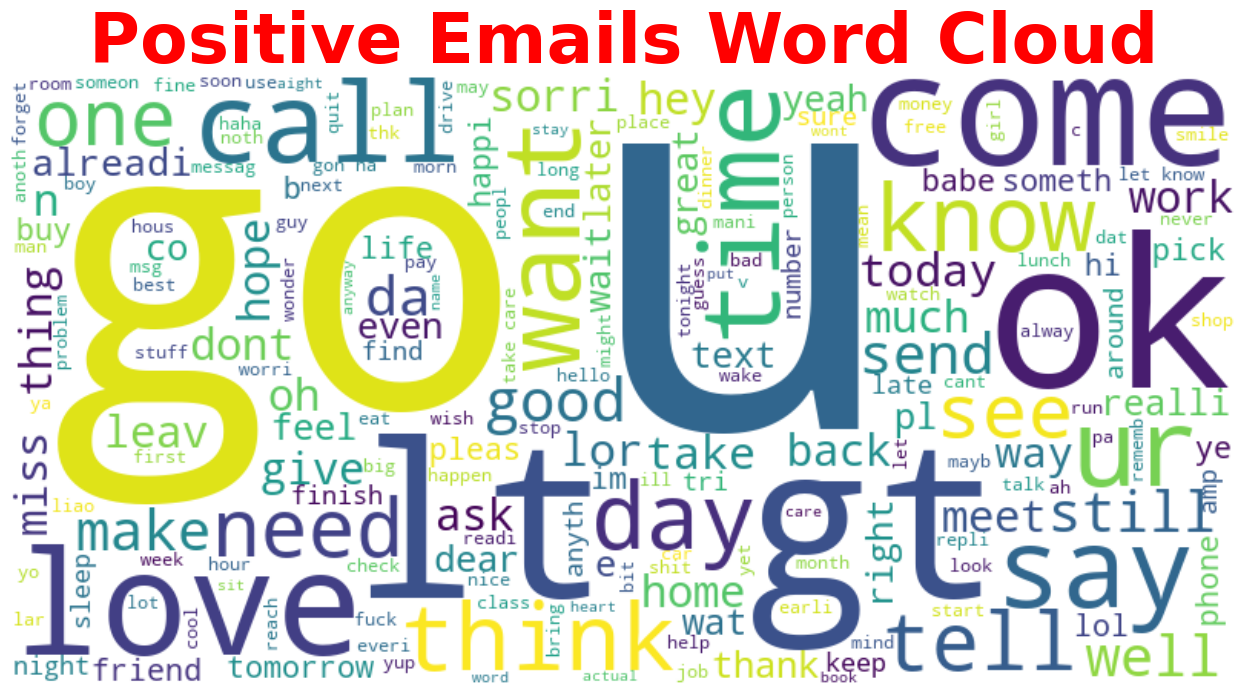

In [51]:
# Plot the word clouds
plt.figure(figsize=(25, 25))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Emails Word Cloud',  fontsize=50, fontweight='bold',color = 'red')
plt.axis('off')
plt.tight_layout()
plt.show()

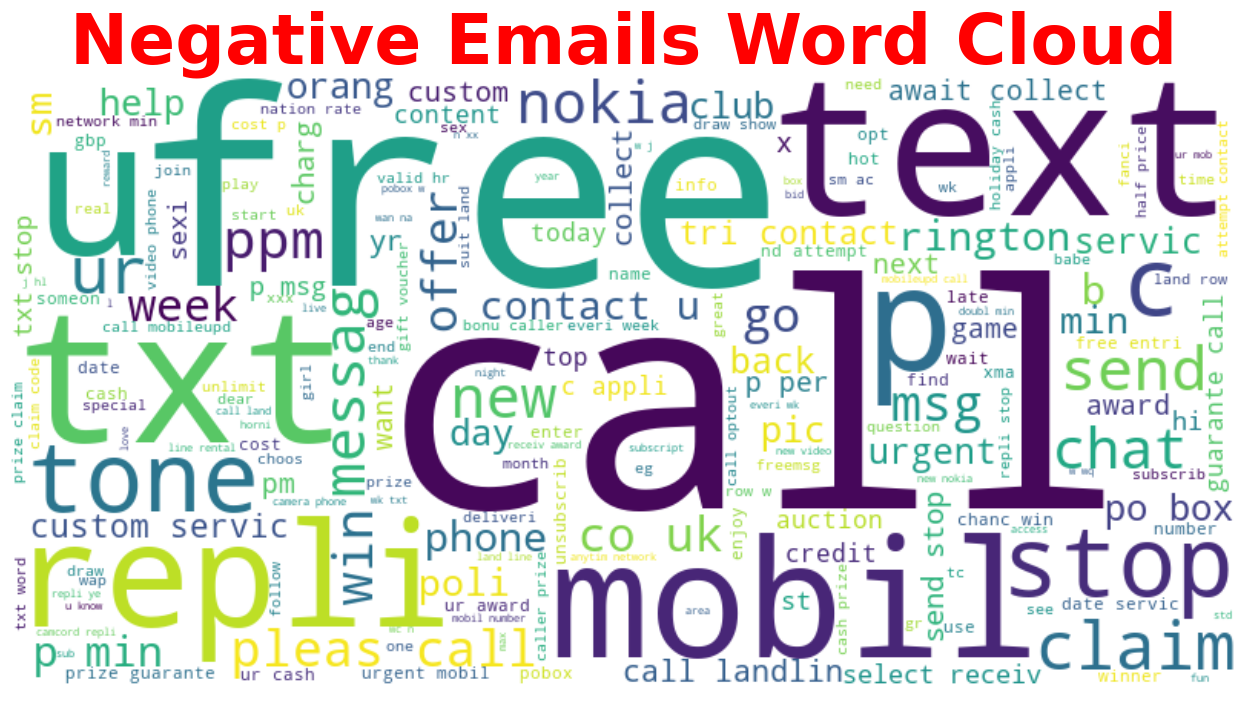

In [52]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Emails Word Cloud',fontsize=50, fontweight='bold',color = 'red')
plt.axis('off')
plt.tight_layout()
plt.show()

# Visualization

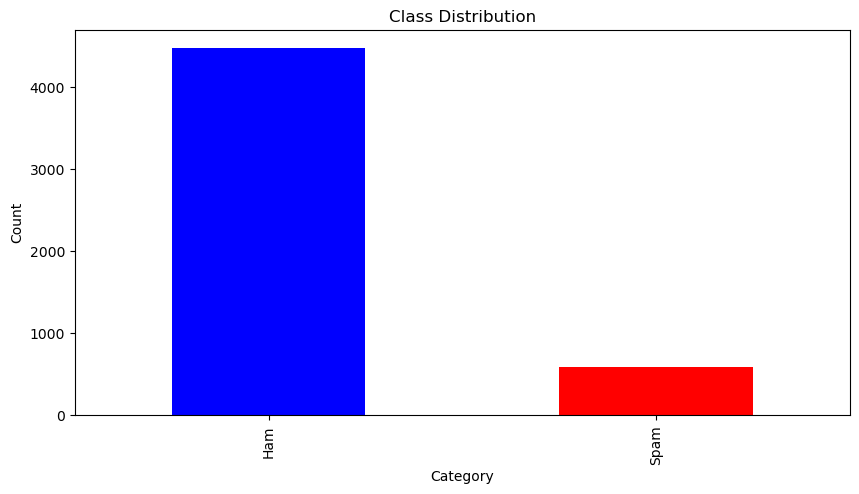

In [53]:
plt.figure(figsize=(10, 5))
# Get the class counts
class_counts = data['Category'].value_counts()
# Define custom colors for each class
colors = ['blue', 'red']
# Plot the bar plot with custom colors
class_counts.plot(kind='bar', color=colors)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

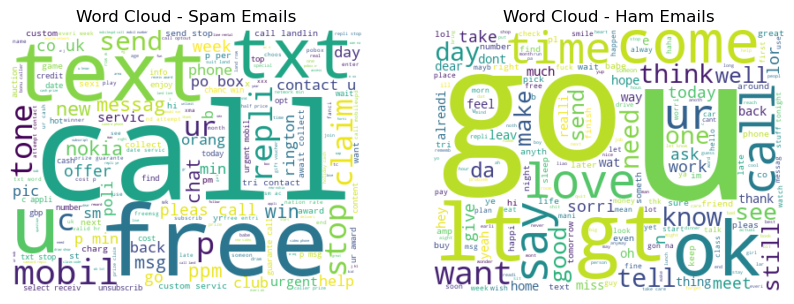

In [54]:
from wordcloud import WordCloud
spam_emails = " ".join(data[data['Category'] == 'Spam']['Emails'])
ham_emails = " ".join(data[data['Category'] == 'Ham']['Emails'])
plt.figure(figsize=(10,10))
# Word Cloud for Spam Emails
plt.subplot(1, 2, 1)
spam_wordcloud = WordCloud(width=400, height=300, background_color='white').generate(spam_emails)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Spam Emails')
plt.axis('off')
# Word Cloud for Ham Emails
plt.subplot(1, 2, 2)
ham_wordcloud = WordCloud(width=400, height=300, background_color='white').generate(ham_emails)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Ham Emails')
plt.axis('off')
plt.show()

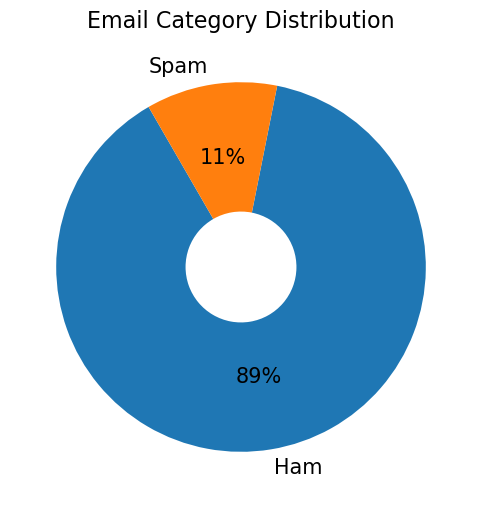

In [55]:
plt.figure(figsize=(6, 6))
data['Category'].value_counts().plot(kind='pie', labels=['Ham', 'Spam'],
                                     wedgeprops=dict(width=0.7),
                                     autopct='%1.0f%%', startangle=120,
                                     textprops={'fontsize': 15})
plt.title('Email Category Distribution', fontsize=16)
plt.ylabel('')
plt.show()


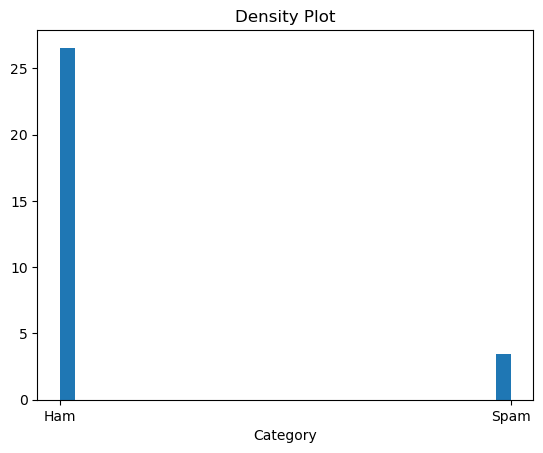

In [56]:
plt.hist((data['Category']), density=True, bins=30)
plt.Figure(figsize=(10,12))
# Add a title and axis labels
plt.title('Density Plot')
plt.xlabel('Category')
# Show the plot
plt.show()

# Feature Extraction: 

In [57]:
data

,Category,Emails
0,Ham,go jurong point crazi avail bugi n great world...
1,Ham,ok lar joke wif u oni
2,Spam,free entri wkli comp win fa cup final tkt st m...
3,Ham,u dun say earli hor u c alreadi say
4,Ham,nah think go usf life around though
...,...,...
5164,Spam,nd time tri contact u u pound prize claim easi...
5165,Ham,b go esplanad fr home
5166,Ham,piti mood suggest
5167,Ham,guy bitch act like interest buy someth els nex...


# 1.CountVectorizer
Countvectorizer is a method to convert text to numerical data.

# 1.1 Count Vectorizer(Unigram)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,1))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x1 = vectorizer.fit_transform(data['Emails'])

In [59]:
print(vectorizer.get_feature_names_out()[0:100])

['aa' 'aah' 'aaniy' 'aaooooright' 'aathi' 'ab' 'abbey' 'abdomen' 'abeg'
 'abel' 'aberdeen' 'abi' 'abil' 'abiola' 'abj' 'abl' 'abnorm' 'abouta'
 'abroad' 'absenc' 'absolut' 'absolutli' 'abstract' 'abt' 'abta' 'aburo'
 'abus' 'ac' 'academ' 'acc' 'accent' 'accentur' 'accept' 'access' 'accid'
 'accident' 'accommod' 'accommodationvouch' 'accomod' 'accordin'
 'accordingli' 'account' 'accumul' 'ach' 'achan' 'achiev' 'acid'
 'acknowledg' 'acl' 'acnt' 'aco' 'across' 'act' 'actin' 'action' 'activ'
 'actor' 'actual' 'ad' 'adam' 'add' 'addamsfa' 'addi' 'addict' 'address'
 'adewal' 'adi' 'adjust' 'admin' 'administr' 'admir' 'admiss' 'admit'
 'ador' 'adp' 'adress' 'adrian' 'adsens' 'adult' 'advanc' 'adventur'
 'advic' 'advis' 'advisor' 'ae' 'aeronaut' 'aeroplan' 'afew' 'affair'
 'affect' 'affection' 'affidavit' 'afford' 'afghanistan' 'afraid' 'africa'
 'african' 'aft' 'afternon' 'afternoon']


In [60]:
x1.shape

(5056, 6123)

In [61]:
pd.DataFrame(x1.toarray())

,0,1,2,3,4,5,6,7,8,9,...,6113,6114,6115,6116,6117,6118,6119,6120,6121,6122
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
def plot_top_ngrams_barchart(text, n=1):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

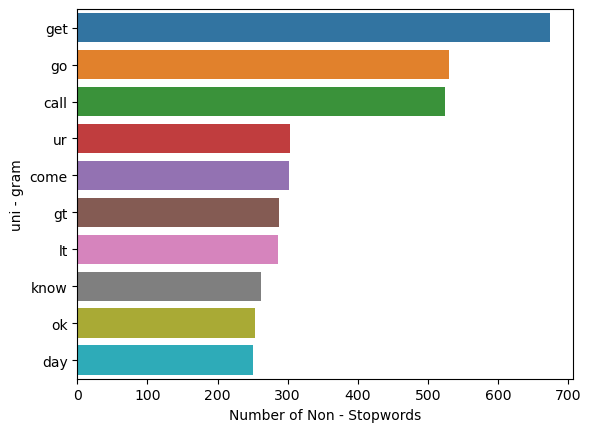

In [63]:
plot_top_ngrams_barchart(data['Emails'],1)

plt.xlabel('Number of Non - Stopwords')
plt.ylabel('uni - gram')
plt.show()

# 1.2 CountVectorizer(Bigram)

In [64]:
vectorizer = CountVectorizer(ngram_range=(2,2))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x2 = vectorizer.fit_transform(data['Emails'])

In [65]:
x2.shape

(5056, 28812)

In [66]:
pd.DataFrame(x2.toarray())

,0,1,2,3,4,5,6,7,8,9,...,28802,28803,28804,28805,28806,28807,28808,28809,28810,28811
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

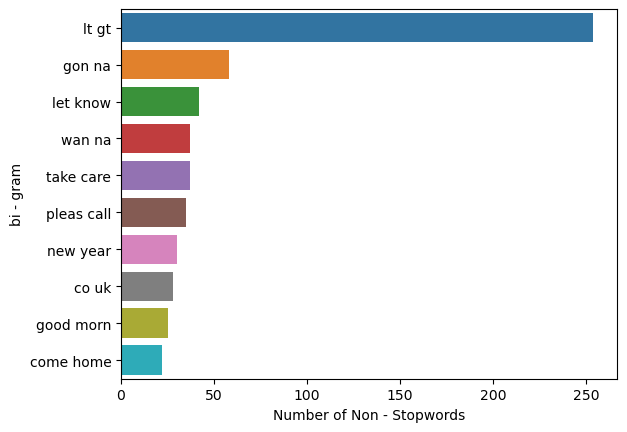

In [68]:
plot_top_ngrams_barchart(data['Emails'],2)

plt.xlabel('Number of Non - Stopwords')
plt.ylabel('bi - gram')
plt.show()

# 1.3 CountVectorizer(Trigram)

In [69]:
vectorizer = CountVectorizer(ngram_range=(3,3))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x3 = vectorizer.fit_transform(data['Emails'])

In [70]:
x3.shape

(5056, 29342)

In [71]:
pd.DataFrame(x3.toarray())

,0,1,2,3,4,5,6,7,8,9,...,29332,29333,29334,29335,29336,29337,29338,29339,29340,29341
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

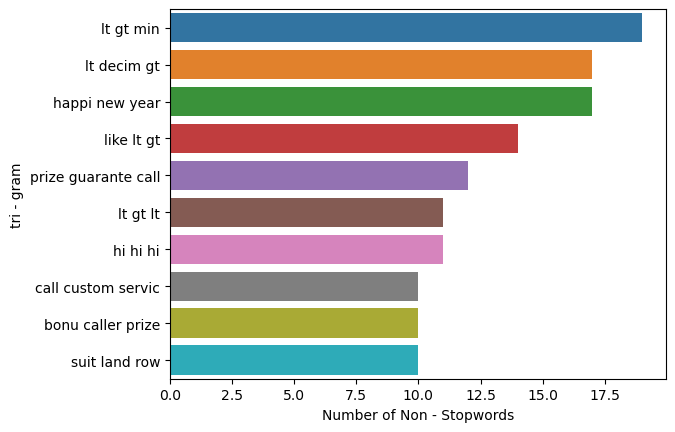

In [73]:
plot_top_ngrams_barchart(data['Emails'],3)

plt.xlabel('Number of Non - Stopwords')
plt.ylabel('tri - gram')
plt.show()

# 1.4 CountVectorizer(Unigram+Trigram)

In [74]:
vectorizer = CountVectorizer(ngram_range=(1,3))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x4 = vectorizer.fit_transform(data['Emails'])

In [75]:
x4.shape

(5056, 64277)

In [76]:
pd.DataFrame(x4.toarray())

,0,1,2,3,4,5,6,7,8,9,...,64267,64268,64269,64270,64271,64272,64273,64274,64275,64276
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2 TF-IDF
TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text.

# 2.1 TF-IDF(Unigram)

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['Emails'])

In [78]:
tfidf.shape

(5056, 6123)

In [79]:
pd.DataFrame(tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,6113,6114,6115,6116,6117,6118,6119,6120,6121,6122
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2.2 TF-IDF (Bigram)

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2))
tfidf = vectorizer.fit_transform(data['Emails'])

In [81]:
tfidf.shape

(5056, 28812)

In [82]:
pd.DataFrame(tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,28802,28803,28804,28805,28806,28807,28808,28809,28810,28811
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2.3 TfIDF(Trigram)

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(3,3))
tfidf = vectorizer.fit_transform(data['Emails'])

In [84]:
tfidf.shape

(5056, 29342)

In [85]:
pd.DataFrame(tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,29332,29333,29334,29335,29336,29337,29338,29339,29340,29341
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2.4 TFIDF(Unigram+Trigram)

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3))
tfidf = vectorizer.fit_transform(data['Emails'])

In [87]:
tfidf.shape

(5056, 64277)

In [88]:
pd.DataFrame(tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,64267,64268,64269,64270,64271,64272,64273,64274,64275,64276
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
# 5. Word2Vec
from gensim.models import Word2Vec
# Tokenize the sentences (assuming each sentence is already preprocessed and tokenized)
sentences = [sentence.split() for sentence in data['Emails']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)
# Create a list of vectors for each word in each sentence
word2vec_vectorized = [word2vec_model.wv[word] for sentence in sentences for word in sentence]
print("Word2Vec (Shape):", len(word2vec_vectorized))

Word2Vec (Shape): 44303


# Model Building

# 1 Using CountVectorizer

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [91]:
cv= CountVectorizer(ngram_range=(1, 3), max_features=10000)
X = cv.fit_transform(data['Emails']).toarray()

In [92]:
data['Category'].replace({'Ham':0,'Spam':1},inplace=True)

In [93]:
y = data['Category']

In [94]:
#Splitting Data Set in Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3792, 10000)
(3792,)
(1264, 10000)
(1264,)


# 1.1 Gaussian Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred_GNB = GNB.predict(X_test)
y_pred_GNB
#Accuracy of GaussianNB Algorithm
Acc_GNB = accuracy_score(y_pred_GNB, y_test)
print('Accuracy of GaussianNB :', Acc_GNB)

Accuracy of GaussianNB : 0.9248417721518988


In [96]:
#Classification Report
report = classification_report(y_pred_GNB, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1052
           1       0.91      0.61      0.73       212

    accuracy                           0.92      1264
   macro avg       0.92      0.80      0.84      1264
weighted avg       0.92      0.92      0.92      1264



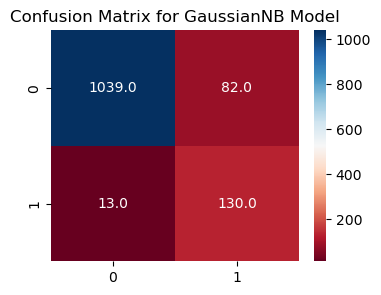

In [97]:
#Making the Confusion Matrix
CM_GNB = confusion_matrix(y_test, y_pred_GNB) 
plt.figure(figsize=(4,3))
sns.heatmap(CM_GNB, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for GaussianNB Model")
plt.show()

# 1.2 Support Vector Machine

In [98]:
from sklearn.svm import SVC
classifier_1= SVC()
classifier_1.fit(X_train,y_train)
y_pred  = classifier_1.predict(X_test)
#Cheking accuracy
svm_ac_1 = accuracy_score(y_pred, y_test)
print('Accuracy of svm :', svm_ac_1)

Accuracy of svm : 0.9754746835443038


In [99]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1152
           1       0.78      1.00      0.88       112

    accuracy                           0.98      1264
   macro avg       0.89      0.99      0.93      1264
weighted avg       0.98      0.98      0.98      1264



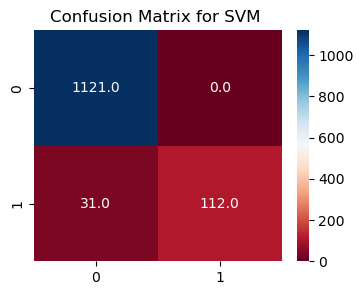

In [100]:
CM_SVM = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(4,3))
sns.heatmap(CM_SVM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for SVM ")
plt.show()

# Comparison Of Models

In [101]:
list = [['Gaussian Naive Bayes',Acc_GNB],['Support Vector Machine',svm_ac_1]]

In [102]:
Result = pd.DataFrame(list, columns = ['Models', 'Accuracy']) 
Result

,Models,Accuracy
0,Gaussian Naive Bayes,0.924842
1,Support Vector Machine,0.975475


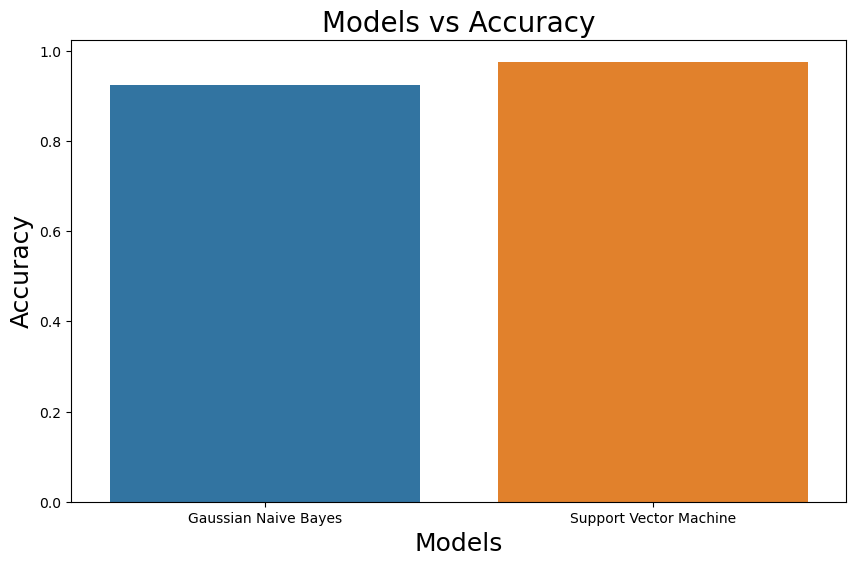

In [103]:
plt.figure(figsize = (10,6))
sns.barplot(data = Result,x = 'Models',y = 'Accuracy')
plt.title('Models vs Accuracy', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xticks(rotation =0)
plt.show()

# 2 Using TF-IDF

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
X = tfidf.fit_transform(data['Emails']).toarray()

In [106]:
data['Category'].replace({'Ham':0,'Spam':1},inplace=True)

In [107]:
y = data['Category']
y

0       0
1       0
2       1
3       0
4       0
       ..
5164    1
5165    0
5166    0
5167    0
5168    0
Name: Category, Length: 5056, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3792, 10000)
(3792,)
(1264, 10000)
(1264,)


# 2.1 Gaussian Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB

In [110]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [111]:
y_pred_GNB = GNB.predict(X_test)
y_pred_GNB

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [112]:
Acc_GNB = accuracy_score(y_pred_GNB, y_test)
print('Accuracy of GaussianNB :', Acc_GNB)

Accuracy of GaussianNB : 0.9240506329113924


In [113]:
report = classification_report(y_pred_GNB, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1057
           1       0.89      0.61      0.73       207

    accuracy                           0.92      1264
   macro avg       0.91      0.80      0.84      1264
weighted avg       0.92      0.92      0.92      1264



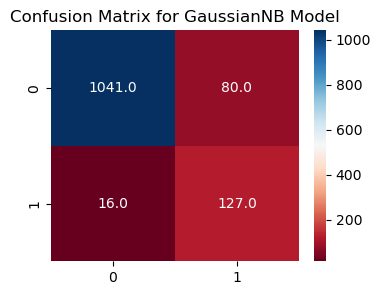

In [114]:
CM_GNB = confusion_matrix(y_test, y_pred_GNB) 
plt.figure(figsize=(4,3))
sns.heatmap(CM_GNB, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for GaussianNB Model")
plt.show()

# 2.2 Support Vector Machine

In [115]:
from sklearn.svm import SVC

In [116]:
classifier = SVC()

In [117]:
classifier.fit(X_train,y_train)

SVC()

In [118]:
y_pred  = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [119]:
#Cheking accuracy
svm_ac = accuracy_score(y_pred, y_test)
print('Accuracy of svm :', svm_ac)

Accuracy of svm : 0.9675632911392406


In [120]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1160
           1       0.72      0.99      0.83       104

    accuracy                           0.97      1264
   macro avg       0.86      0.98      0.91      1264
weighted avg       0.98      0.97      0.97      1264



In [121]:
CM_SVM = confusion_matrix(y_test, y_pred) 

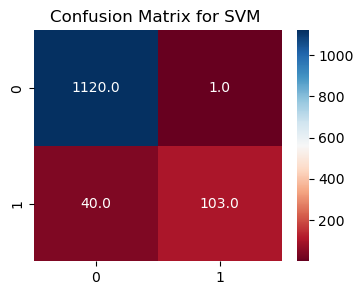

In [122]:
plt.figure(figsize=(4,3))
sns.heatmap(CM_SVM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for SVM ")
plt.show()

# Comparison Of Models

In [123]:
list = [['Gaussian Naive Bayes',Acc_GNB],['Support Vector Machine',svm_ac]]

In [124]:
Result = pd.DataFrame(list, columns = ['Models', 'Accuracy']) 
Result

,Models,Accuracy
0,Gaussian Naive Bayes,0.924051
1,Support Vector Machine,0.967563


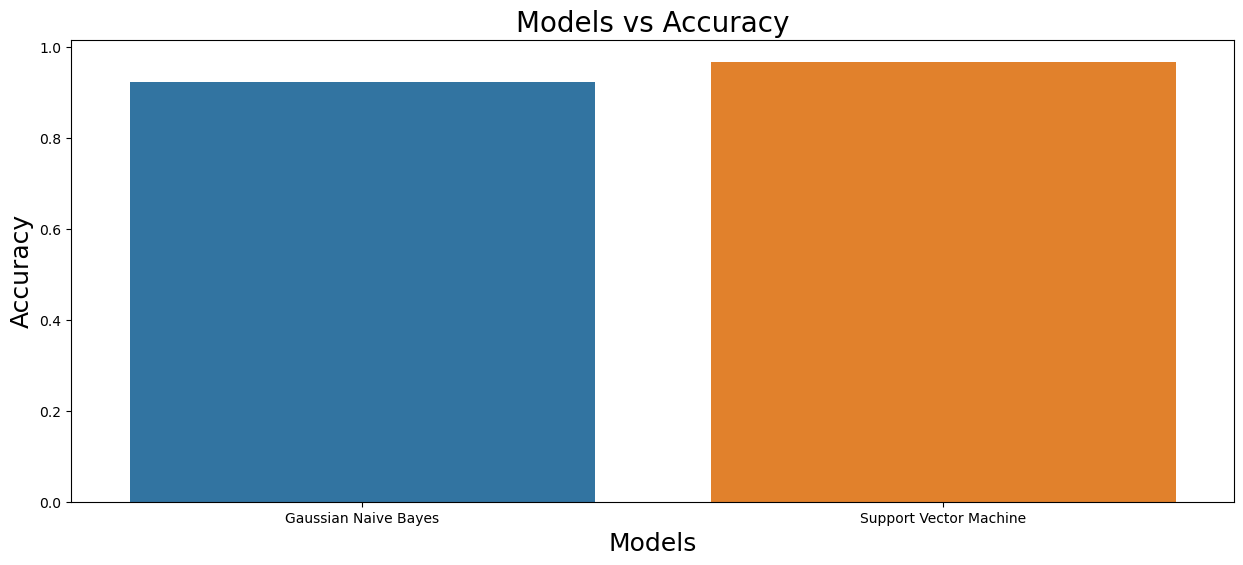

In [125]:
plt.figure(figsize = (15,6))
sns.barplot(data = Result,x = 'Models',y = 'Accuracy')
plt.title('Models vs Accuracy', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xticks(rotation =0)
plt.show()

# Conclusion:

# Best Accuracy Model Saving

Using Count Vectorizer(Unigram + Trigram) Support Vector Machine Gives Best Accuracy i.e 97.54% 

In [126]:
import pickle

In [127]:
pickle.dump(cv, open('CountVectorizer.pkl', 'wb'))

In [128]:
import pickle
pickle.dump(classifier_1, open('svm.pkl', 'wb'))

In [129]:
pickled_model = pickle.load(open('svm.pkl', 'rb'))
pickled_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [130]:
# saving data into csv for model buiding pov
data.to_csv('Spam_new.csv')

# Thank You!